In [ ]:
"""
    Copyright (c) 2021 UNISAL - Campus São José

"""

In [ ]:
"""
    PROCESSO 0 - Importação das bibliotecas e pacotes utilizados

"""
import os
import pandas as pd
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor # Import Random Forest Regressor
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation

In [ ]:
from google.colab import drive
drive.mount('drive')

In [ ]:
"""
    PROCESSO 1 - Seleção dos dados - Dataset-> Diamonds

"""

In [ ]:
arquivo = pd.read_csv('drive/My Drive/Unisal_Machine_Deep_Learning/Dataset/Diamonds.csv', sep=',')

In [ ]:
"""
    PROCESSO 2 - Pré-processamento

"""

In [ ]:
# Visualização
arquivo.head()

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# Eliminação da coluna  "ID"
arquivo = arquivo.drop(columns='id')

In [ ]:
# Pré-processamento 1 - Eliminação de valores inconsistentes - Analisando as variáveis X, Y e Z
### Características físicas do diamente
arquivo.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
# Aplicação do .loc - Eliminação por Linha do Dataset
arquivo = arquivo.drop(arquivo.loc[arquivo.x == 0].index)
arquivo = arquivo.drop(arquivo.loc[arquivo.y == 0].index)
arquivo = arquivo.drop(arquivo.loc[arquivo.z == 0].index)

In [ ]:
# Processado 1 - Eliminação de valores inconsistentes - Analisando as variáveis X, Y e Z
arquivo.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Text(0.5, 0, 'Variável Z')

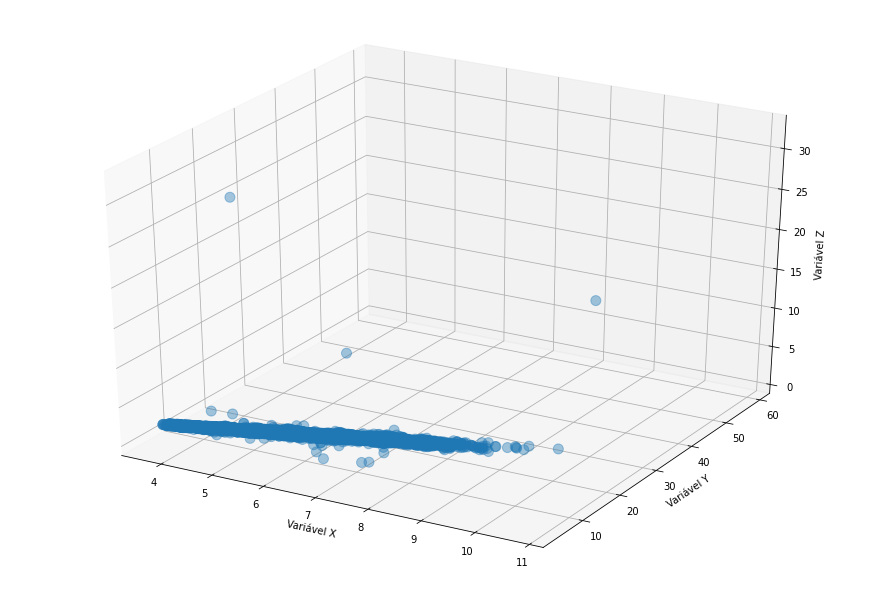

In [ ]:
# Pré-processamento 2 - Identificação dos Outliers - Analisando as variáveis X, Y e Z
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)

# Plot 3D
ax.scatter(xs=arquivo['x'], ys=arquivo['y'], zs=arquivo['z'], s=100, alpha=0.4)
ax.set_xlabel('Variável X')
ax.set_ylabel('Variável Y')
ax.set_zlabel('Variável Z')

In [ ]:
# Processado 2 - Identificação dos Outliers e remoção dos Y e Z
arquivo = arquivo.drop(arquivo.loc[arquivo.y > 35].index)
arquivo = arquivo.drop(arquivo.loc[arquivo.z > 25].index)

Text(0.5, 0, 'Variável Z')

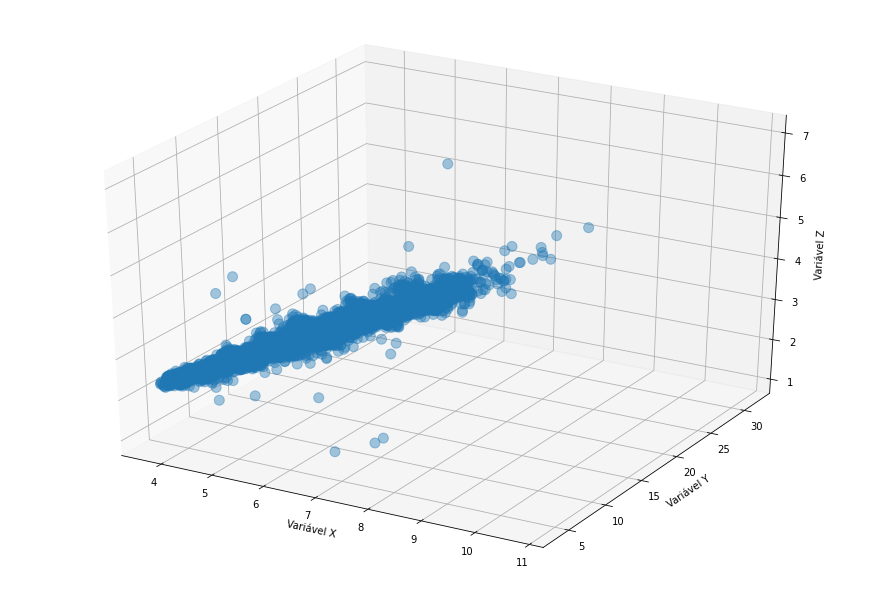

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)

# plot 3D
ax.scatter(xs=arquivo['x'], ys=arquivo['y'], zs=arquivo['z'], s=100, alpha=0.4)
ax.set_xlabel('Variável X')
ax.set_ylabel('Variável Y')
ax.set_zlabel('Variável Z')

In [ ]:
# Calculo do Volume
arquivo['volume'] = arquivo['x']*arquivo['y']*arquivo['z']
arquivo = arquivo.drop(['x','y','z'],axis=1)

In [ ]:
"""
    PROCESSO 3 -> Transformação dos dados

"""
### Transformação 1 - Transformação em Fator das variáveis Categóricas

# Transformação CUT p/ Fator
arquivo['cut'] = arquivo['cut'].replace('Fair', 0)
arquivo['cut'] = arquivo['cut'].replace('Good', 1)
arquivo['cut'] = arquivo['cut'].replace('Very Good', 2)
arquivo['cut'] = arquivo['cut'].replace('Premium', 3)
arquivo['cut'] = arquivo['cut'].replace('Ideal', 4)

# Transformação COLOR p/ Fator
arquivo['color'] = arquivo['color'].replace('J', 0)
arquivo['color'] = arquivo['color'].replace('I', 1)
arquivo['color'] = arquivo['color'].replace('H', 2)
arquivo['color'] = arquivo['color'].replace('G', 3)
arquivo['color'] = arquivo['color'].replace('F', 4)
arquivo['color'] = arquivo['color'].replace('E', 5)
arquivo['color'] = arquivo['color'].replace('D', 6)

# Transformação CLARITY p/ Fator
arquivo['clarity'] = arquivo['clarity'].replace('I1', 0)
arquivo['clarity'] = arquivo['clarity'].replace('SI2', 1)
arquivo['clarity'] = arquivo['clarity'].replace('SI1', 2)
arquivo['clarity'] = arquivo['clarity'].replace('VS2', 3)
arquivo['clarity'] = arquivo['clarity'].replace('VS1', 4)
arquivo['clarity'] = arquivo['clarity'].replace('VVS2', 5)
arquivo['clarity'] = arquivo['clarity'].replace('VVS1', 6)
arquivo['clarity'] = arquivo['clarity'].replace('IF', 7)

In [ ]:
# Separando as variaveis entre preditoras e variável alvo - No caso desejamos estimar a variável PRICE
y = arquivo['price']
X = arquivo.drop('price', axis=1)

In [ ]:
 ### Separação dos dados em treino e teste
 X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, random_state=1, test_size=0.3)

In [ ]:
### Transformação 2 - Normalização das Variáveis

scaler = StandardScaler()

X_treino_s = X_treino.copy()
X_treino_s[['carat','table','volume','cut','depth']]=scaler.fit_transform(X_treino_s[['carat','table','volume','cut','depth']])
normalized_x_treino = pd.DataFrame(X_treino_s, columns = X_treino.columns)
X_treino = normalized_x_treino
X_teste_s = X_teste.copy()
X_teste_s[['carat','table','volume','cut','depth']] = scaler.transform(X_teste_s[['carat','table','volume','cut','depth']])
normalized_x_teste = pd.DataFrame(X_teste_s, columns = X_teste.columns)
X_teste = normalized_x_teste

In [ ]:
# Função de diferença entre os algoritmos
def differencePlot(y_test, y_predict, c1, c2):
    fig, ax = plt.subplots(figsize=(10,6))
    ax.set(xlabel = 'Preço Estimado', ylabel = 'Preço Real - Preço Estimado', title = 'Intervalo entre o que é desejado e o que está presente nos dados')
    ax.scatter(y_predict, y_test - y_predict, alpha = 0.15, color = c1)
    ax.axhline(y = 0, color = c2)

In [ ]:
"""
    Processos 4 e 5 - Mineração dos dados (Aplicação dos algoritmos) / Avaliação e interpretação dos resultados

"""

In [ ]:
#==============================#
# Model 00 ___ Dummy Regressor
#==============================#

In [ ]:
# The model choosen
dummy_reg = DummyRegressor(strategy="median")
# Fit the model
dummy_reg.fit(X_treino, y_treino)
# Predict the prices of "X_teste"
dummy_reg_pred = dummy_reg.predict(X_teste)

In [ ]:
# Print the accuracy by each measure:
print('Dummy regression accuracy: ')
crossr = cross_val_score(estimator = dummy_reg, X = X_treino, y = y_treino, cv = 4,verbose = 0)
msed = mean_squared_error(y_teste, dummy_reg_pred)
rmsed = mean_squared_error(y_teste, dummy_reg_pred)**0.5
maed = mean_absolute_error(y_teste, dummy_reg_pred)
r2d = r2_score(y_teste, dummy_reg_pred)

print('Cross val     : ',crossr)
print('R2            : ', r2d)
print('MAE           : ', maed)
print('MSE (RMSE)    : ', msed,' (',rmsed,')')

Dummy regression accuracy: 
Cross val     :  [-0.15196595 -0.15957589 -0.13239198 -0.15287487]
R2            :  -0.1520358959885444
MAE           :  2772.3613377843717
MSE (RMSE)    :  17774809.641629573  ( 4216.018221216504 )


In [ ]:
differencePlot(y_teste, dummy_reg_pred, 'forestgreen', 'darkgreen')

In [ ]:
#================================#
# Model 01 ___ Linear Regression
#================================#

In [ ]:
# The model choosen
lin_reg = LinearRegression()
# Fit the model
lin_reg.fit(X_treino, y_treino)
# Predict the prices of "X_teste"
lin_reg_pred = lin_reg.predict(X_teste)

In [ ]:
# Print the accuracy by each measure:
print('Linear Regressor accuracy: ')
crossr = cross_val_score(estimator = lin_reg, X = X_treino, y = y_treino, cv = 4,verbose = 0)
mser = mean_squared_error(y_teste, lin_reg_pred)
rmser = mean_squared_error(y_teste, lin_reg_pred)**0.5
maer = mean_absolute_error(y_teste, lin_reg_pred)
r2r = r2_score(y_teste, lin_reg_pred)

print('Cross val     : ',crossr)
print('R2            : ', r2r)
print('MAE           : ', maer)
print('MSE (RMSE)    : ', mser,' (',rmser,')')

Linear Regressor accuracy: 
Cross val     :  [0.89718917 0.9022417  0.90444793 0.9085884 ]
R2            :  0.9057252847678912
MAE           :  844.3574547349529
MSE (RMSE)    :  1454568.493138545  ( 1206.0549295693563 )


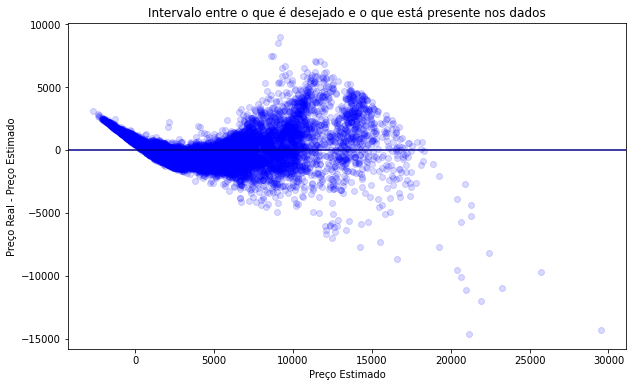

In [ ]:
differencePlot(y_teste, lin_reg_pred, 'blue', 'darkblue')

In [ ]:
#=====================================#
# Model 02 ___ Random Forest Regressor
#=====================================#

In [ ]:
# The model choosen
rf_reg = RandomForestRegressor(n_estimators = 10)
# Fit the model
rf_reg.fit(X_treino, y_treino)
# Predict the prices of "X_teste"
rf_reg_pre = rf_reg.predict(X_teste)

In [ ]:
# print the accuracy by each measure:
print('Random Forest Regressor accuracy: ')
crossr = cross_val_score(estimator = rf_reg, X = X_treino, y = y_treino, cv = 4,verbose = 0)
mser = mean_squared_error(y_teste, rf_reg_pre)
rmser = mean_squared_error(y_teste, rf_reg_pre)**0.5
maer = mean_absolute_error(y_teste, rf_reg_pre)
r2r = r2_score(y_teste, rf_reg_pre)

print('Cross val     : ',crossr)
print('R2            : ', r2r)
print('MAE           : ', maer)
print('MSE (RMSE)    : ', mser,' (',rmser,')')

Random Forest Regressor accuracy: 
Cross val     :  [0.97736894 0.97744857 0.97818345 0.97880888]
R2            :  0.9800036707768391
MAE           :  287.2158413821966
MSE (RMSE)    :  308524.1933091411  ( 555.4495416409496 )


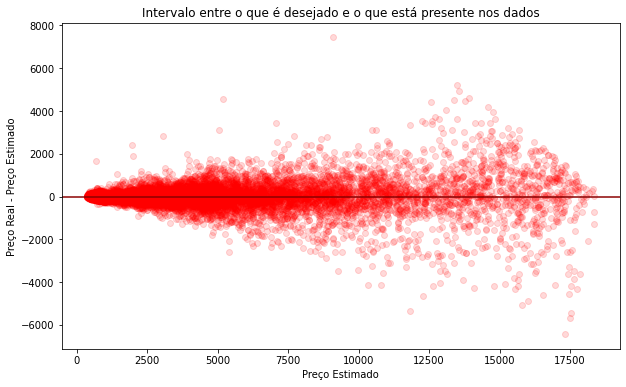

In [ ]:
differencePlot(y_teste, rf_reg_pre, 'red', 'darkred')

In [ ]:
#==================================#
# Model 03 ___ KNeighborsRegressor
#==================================#

In [ ]:
# The model choosen
kdd_reg = KNeighborsRegressor(n_neighbors = 8, metric = 'minkowski', p = 2)
# Fit the model
kdd_reg.fit(X_treino, y_treino)
# Predict the prices of "X_teste"
kdd_reg_pre = kdd_reg.predict(X_teste)

In [ ]:
# print the accuracy by each measure:
print('KNeighbors Regressor accuracy: ')
crossr = cross_val_score(estimator = kdd_reg, X = X_treino, y = y_treino, cv = 4,verbose = 0)
mser = mean_squared_error(y_teste, kdd_reg_pre)
rmser = mean_squared_error(y_teste, kdd_reg_pre)**0.5
maer = mean_absolute_error(y_teste, kdd_reg_pre)
r2r = r2_score(y_teste, kdd_reg_pre)

print('Cross val     : ',crossr)
print('R2            : ', r2r)
print('MAE           : ', maer)
print('MSE (RMSE)    : ', mser,' (',rmser,')')

KNeighbors Regressor accuracy: 
Cross val     :  [0.962003   0.96216581 0.96283371 0.96303816]
R2            :  0.9657243614586464
MAE           :  420.62084260633037
MSE (RMSE)    :  528840.2492832746  ( 727.214032650137 )


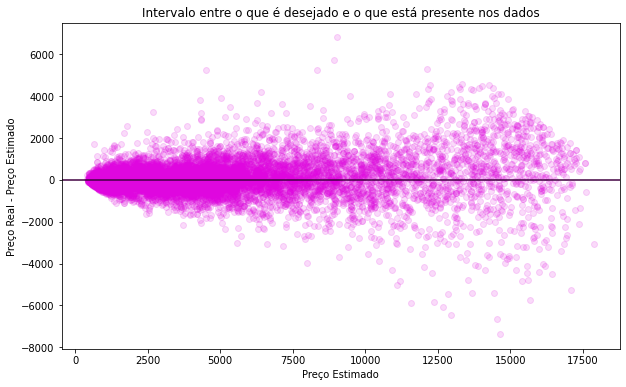

In [ ]:
differencePlot(y_teste, kdd_reg_pre, '#df07df', '#400040')